# Train baseline clinical transformer Model for Survival
This is the training of the clinical transformer withoug using pre-trained weights from the self uspervised model.

In [1]:

import os
os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/home/shenwanxiang/anaconda3"

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import tensorflow as tf
tf.test.is_gpu_available()
tf.__version__

tf.config.run_functions_eagerly(True)

import sys
sys.path.append('../../../codeocean/environment/clinical_transformer/')

2025-08-14 16:18:57.564933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 16:18:57.622375: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-14 16:18:57.990601: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shenwanxiang/anaconda3/lib:
2025-08-14 16:18:57.990636: W tensorflow/compiler/xla/stream_exe

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2025-08-14 16:18:58.408281: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 16:18:58.418678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 16:18:58.435235: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 16:18:58.435328: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at

In [2]:
from xai.models import Trainer
from xai.models import SurvivalTransformer
from xai.models import OptimizedSurvivalDataGenerator as SurvivalDataGenerator
from xai.losses.survival import cIndex_SigmoidApprox as cindex_loss
from xai.metrics.survival import sigmoid_concordance as cindex_metric

In [3]:
import pandas as pd
from samecode.random import set_seed

## Dataset

In [4]:
data = pd.read_csv('./data/dataset-train.data.csv')
features = data.columns[-44:].tolist()

## Parameters

In [5]:
max_features_percentile=100
test_size=0.1 # fraction of samples used for testing
repetitions=10 # number replicates (training / testing) random splits to evaluate variability.

mode='survival'
learning_rate=0.0001
epochs=300
verbose=1
seed=0
embedding_size = 128
num_heads = 2
num_layers = 8

In [6]:
! rm -r ./results/Survival/

/bin/sh: /home/shenwanxiang/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/sh)


## Training

In [ ]:
outdir = './results/Survival/'

set_seed(0)

trainer = Trainer(
    out_dir = outdir,
    max_features_percentile=max_features_percentile,
    test_size=test_size,
    mode=mode,
    model=SurvivalTransformer, 
    dataloader=SurvivalDataGenerator,
    loss=cindex_loss,
    metrics=[cindex_metric]
)

trainer.setup_data(
    data, 
    discrete_features = [],
    continuous_features = features,
    target=['time', 'event']
)

trainer.setup_model(
    learning_rate=learning_rate,
    embedding_size=embedding_size,
    num_heads=num_heads,
    num_layers=num_layers,
    batch_size_max=True,
    save_best_only=False
)

trainer.fit(repetitions=repetitions, epochs=epochs, verbose=verbose, seed=seed)

/home/shenwanxiang/.local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO	2025-08-14 16:18:59,879	Setting up working directory: ./results/Survival/
INFO	2025-08-14 16:18:59,879	Number of continuous features: 44
INFO	2025-08-14 16:18:59,880	Number of discrete features: 0
INFO	2025-08-14 16:18:59,880	Number of samples: 562
INFO	2025-08-14 16:18:59,885	Number of classes: 1
INFO	2025-08-14 16:18:59,885	RUN ID: fold-0_id-0
INFO	2025-08-14 16:18:59,886	RUN ID out directory: ./results/Survival//fold-0_id-0/
INFO	2025-08-14 16:18:59,942	Training samples: 505
INFO	2025-08-14 16:18:59,942	Testing samples: 57
INFO	2025-08-14 16:18:59,944	Number of features at 100th percentile: 44 that are non nans
2025-08-14 16:18:59.944682: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NU

Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 16:19:00,837	AutoGraph could not transform <function cIndex_SigmoidApprox at 0x7f57c54ce5f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 16:19:01,079	AutoGraph could not transform <function sigmoid_concordance at 0x7f576e3d5dd0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 557ms/step - loss: 0.5022 - sigmoid_concordance: 0.4997 - val_loss: 0.4988 - val_sigmoid_concordance: 0.5611
Epoch 2/300
1/1 [==============================] - 0s 295ms/step - loss: 0.4965 - sigmoid_concordance: 0.5089 - val_loss: 0.4980 - val_sigmoid_concordance: 0.5927
Epoch 3/300
1/1 [==============================] - 0s 297ms/step - loss: 0.5066 - sigmoid_concordance: 0.4813 - val_loss: 0.4980 - val_sigmoid_concordance: 0.5947
Epoch 4/300
1/1 [==============================] - 0s 304ms/step - loss: 0.5080 - sigmoid_concordance: 0.4876 - val_loss: 0.4982 - val_sigmoid_concordance: 0.5828
Epoch 5/300
1/1 [==============================] - 0s 296

INFO	2025-08-14 16:20:32,065	RUN ID: fold-1_id-1
INFO	2025-08-14 16:20:32,065	RUN ID out directory: ./results/Survival//fold-1_id-1/
INFO	2025-08-14 16:20:32,124	Training samples: 505
INFO	2025-08-14 16:20:32,124	Testing samples: 57
INFO	2025-08-14 16:20:32,125	Number of features at 100th percentile: 44 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 0s 468ms/step - loss: 0.4856 - sigmoid_concordance: 0.5309 - val_loss: 0.4985 - val_sigmoid_concordance: 0.5489
Epoch 2/300
1/1 [==============================] - 0s 295ms/step - loss: 0.4953 - sigmoid_concordance: 0.5094 - val_loss: 0.4980 - val_sigmoid_concordance: 0.5583
Epoch 3/300
1/1 [==============================] - 0s 293ms/step - loss: 0.5164 - sigmoid_concordance: 0.4649 - val_loss: 0.4980 - val_sigmoid_concordance: 0.5583
Epoch 4/300
1/1 [==============================] - 0s 300ms/step - loss: 0.5069 - sigmoid_concordance: 0.4828 - val_loss: 0.4980 - val_sigmoid_concordance: 0.5609
Epoch 5/300
1/1 [==============================] - 0s 293ms/step - loss: 0.5014 - sigmoid_concordance: 0.5002 - val_loss: 0.4977 - val_sigmoid_concordance: 0.5609
Epoch 6/300
1/1 [==============================] - 0s 303ms/step - loss: 0.4850 - sigmoid_concordance: 0.5313 - val_loss: 0.4974 - val_sigmoid_concordance: 0.5583
Epoch 7/300
1/1 [=====

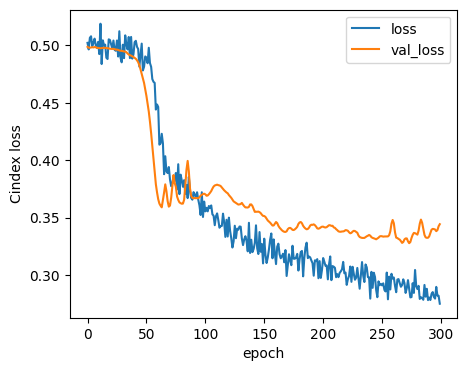

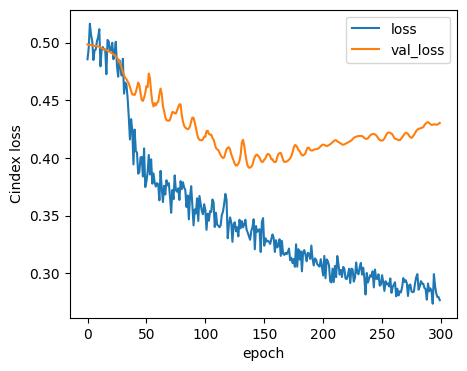

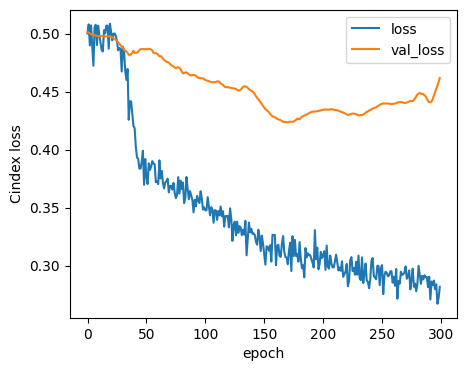

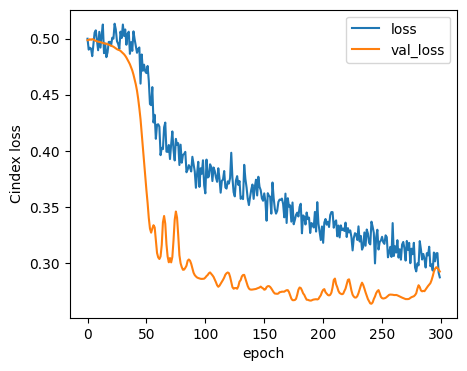

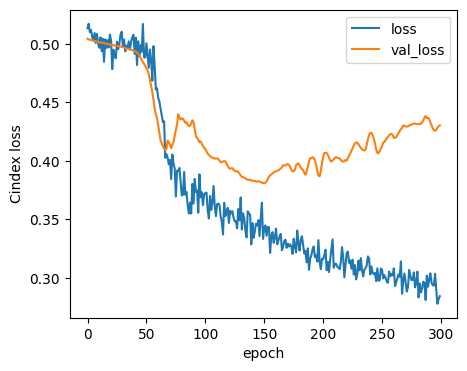

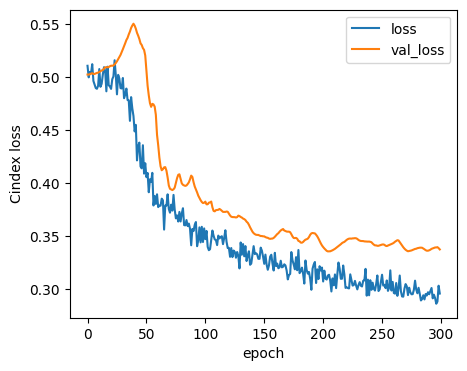

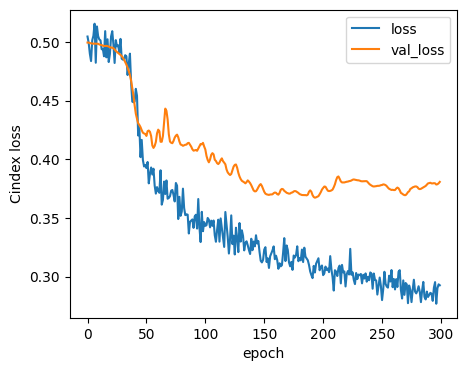

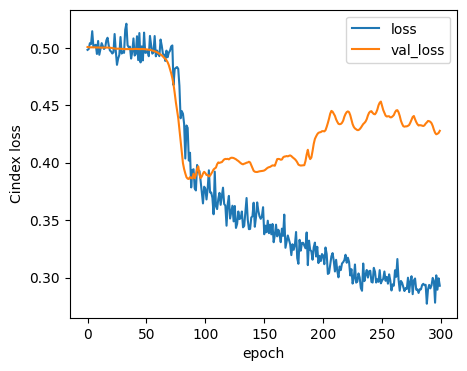

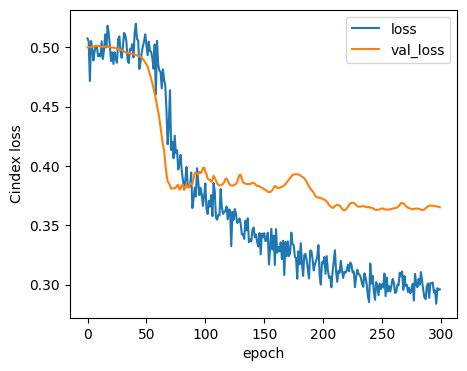

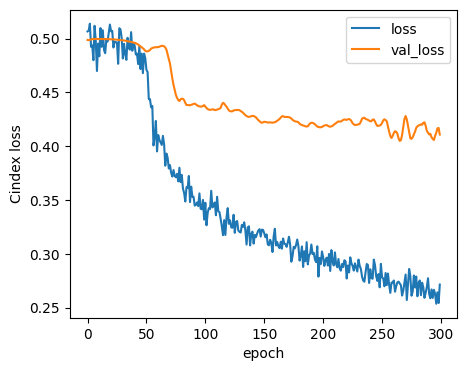

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
best_es = []
for i in range(repetitions):
    dfh = pd.read_csv("./results/Survival/fold-%s_id-%s/history.csv" % (i,i), index_col=0)
    fig, ax=plt.subplots(figsize=(5,4))
    dfh[['loss', 'val_loss']].plot(ax=ax)
    ax.set_ylabel('Cindex loss')
    
    best_e1 = dfh.val_loss.idxmin()
    best_e2 = dfh.val_sigmoid_concordance.idxmax()
    best_es.append(best_e1)
    #best_es.append(best_e2)
    
best_epoch = pd.DataFrame(best_es)[0].median()

In [15]:
pd.DataFrame(best_es).median()

0    198.5
dtype: float64

In [16]:
pd.DataFrame(best_es)

,0
0,273
1,137
2,169
3,241
4,150
5,204
6,193
7,86
8,218
9,265
